In [1]:
# import gtzan then use mfccs as input data for ten class classification for vgg19

# DATA Collection and EDA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle_api_credentials/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification

mkdir: cannot create directory ‘/root/.kaggle’: File exists
gtzan-dataset-music-genre-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
! unzip gtzan-dataset-music-genre-classification.zip

Archive:  gtzan-dataset-music-genre-classification.zip
replace Data/features_30_sec.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Data/features_3_sec.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Data/features_3_sec.csv  
  inflating: Data/genres_original/blues/blues.00000.wav  
  inflating: Data/genres_original/blues/blues.00001.wav  
  inflating: Data/genres_original/blues/blues.00002.wav  
  inflating: Data/genres_original/blues/blues.00003.wav  
  inflating: Data/genres_original/blues/blues.00004.wav  
  inflating: Data/genres_original/blues/blues.00005.wav  
  inflating: Data/genres_original/blues/blues.00006.wav  
  inflating: Data/genres_original/blues/blues.00007.wav  
  inflating: Data/genres_original/blues/blues.00008.wav  
  inflating: Data/genres_original/blues/blues.00009.wav  
  inflating: Data/genres_original/blues/blues.00010.wav  
  inflating: Data/genres_original/blues/blues.00011.wav  
  inflating: Data/genres_original/blues/blues.00012.wav  
  inf

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os, json, math, librosa

import IPython.display as ipd
import librosa.display

import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D

import sklearn.model_selection as sk

from sklearn.model_selection import train_test_split

In [7]:
dataset = []
labels = []

In [8]:
# def prepare_Images(label,path):
#     img=cv2.imread(path,cv2.IMREAD_COLOR)
#     try:
#       img_res=cv2.resize(img,(224,224))
#       img_array = img_to_array(img_res)
#       img_array = img_array/255.0
#       dataset.append(img_array)
#       if str(label) == 'blues':
#         labels.append('blues')
#       elif str(label) == 'classical':
#         labels.append('classical')
#       elif str(label) == 'country':
#         labels.append('country')
#       elif str(label) == 'disco':
#         labels.append('disco')
#       elif str(label) == 'hiphop':
#         labels.append('hiphop')
#       elif str(label) == 'jazz':
#         labels.append('jazz')
#       elif str(label) == 'metal':
#         labels.append('metal')
#       elif str(label) == 'pop':
#         labels.append('pop')
#       elif str(label) == 'reggae':
#         labels.append('reggae')
#       else:
#         labels.append('rock')
#     except:
#       print("error")

In [9]:
filename = '/content/Data/genres_original/blues/blues.00000.wav'

In [10]:
import IPython.display as ipd   #load the audio in the form wav files
import librosa 
import librosa.display

Blues sample


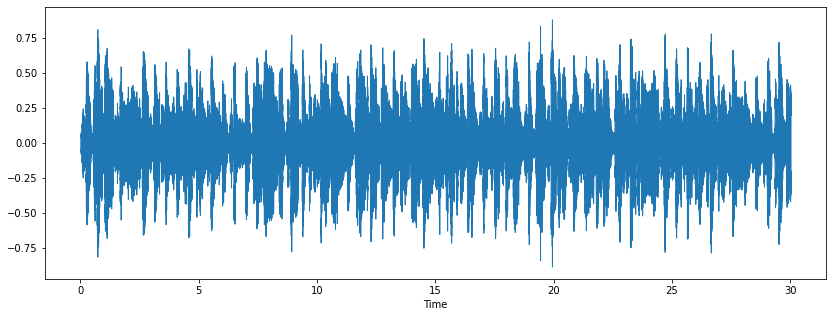

In [11]:
## blues sample
plt.figure(figsize=(14,5))
print("Blues sample")
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [12]:
sample_rate   # how many times per second a sound is sampled ... 22050 = 22KHz

22050

In [13]:
from scipy.io import wavfile as wav

In [14]:
wave_sample_rate, wave_audio = wav.read(filename)

In [15]:
wave_sample_rate

22050

In [16]:
wave_audio      #scipy doesnt normaluize the values

array([  240,   544,   250, ..., -1822, -2001, -2103], dtype=int16)

In [17]:
data  #librosa normalizes the values between -1 and 1

array([ 0.00732422,  0.01660156,  0.00762939, ..., -0.05560303,
       -0.06106567, -0.06417847], dtype=float32)

In [18]:
#librosa tries to converge signal into mono and normalizes the audio signal between -1 and 1 also it is able to convert the sample rate to 22khz

In [19]:
import pandas as pd

metadata = pd.read_csv('/content/Data/features_30_sec.csv')

In [20]:
metadata.head(20)

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0   blues.00000.wav  661794          0.350088         0.088757  0.130228   
1   blues.00001.wav  661794          0.340914         0.094980  0.095948   
2   blues.00002.wav  661794          0.363637         0.085275  0.175570   
3   blues.00003.wav  661794          0.404785         0.093999  0.141093   
4   blues.00004.wav  661794          0.308526         0.087841  0.091529   
5   blues.00005.wav  661794          0.302456         0.087532  0.103494   
6   blues.00006.wav  661794          0.291328         0.093981  0.141874   
7   blues.00007.wav  661794          0.307955         0.092903  0.131822   
8   blues.00008.wav  661794          0.408879         0.086512  0.142416   
9   blues.00009.wav  661794          0.273950         0.092316  0.081314   
10  blues.00010.wav  661794          0.303993         0.094703  0.142865   
11  blues.00011.wav  661794          0.367152         0.102329  0.065741   
12  blues.00012.wav  661794          0.269391         0.093902  0.119046   
13  blues.00013.wav  661794          0.264713         0.091176  0.113170   
14  blues.00014.wav  661794          0.329036         0.108111  0.067055   
15  blues.00015.wav  661794          0.269690         0.094989  0.080624   
16  blues.00016.wav  661794          0.304186         0.098493  0.081472   
17  blues.00017.wav  661794          0.302124         0.093346  0.093306   
18  blues.00018.wav  661794          0.269932         0.097658  0.079706   
19  blues.00019.wav  661794          0.257325         0.095963  0.097660   

     rms_var  spectral_centroid_mean  spectral_centroid_var  \
0   0.002827             1784.165850           1.297741e+05   
1   0.002373             1530.176679           3.758501e+05   
2   0.002746             1552.811865           1.564676e+05   
3   0.006346             1070.106615           1.843559e+05   
4   0.002303             1835.004266           3.433999e+05   
5   0.003981             1831.993940           1.030482e+06   
6   0.008803             1459.366472           4.378594e+05   
7   0.005531             1451.667066           4.495682e+05   
8   0.001507             1719.368948           1.632828e+05   
9   0.004347             1817.150863           2.982361e+05   
10  0.009200             1409.955256           2.056668e+05   
11  0.002500             1352.659665           5.121351e+05   
12  0.004053             1360.641197           2.570654e+05   
13  0.004189             1324.293218           1.714750e+05   
14  0.002717             1171.848227           1.472785e+05   
15  0.002829             1420.365165           1.999590e+05   
16  0.002641             1454.963941           1.523171e+05   
17  0.002151             1088.844230           2.316408e+05   
18  0.002956             1537.587699           1.931021e+05   
19  0.002575             1195.470376           2.495229e+05   

    spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0               2002.449060            85882.761315  ...   52.420910   
1               2039.036516           213843.755497  ...   55.356403   
2               1747.702312            76254.192257  ...   40.598766   
3               1596.412872           166441.494769  ...   44.427753   
4               1748.172116            88445.209036  ...   86.099236   
5               1729.653287           201910.508633  ...   72.549225   
6               1389.009131           185023.239545  ...   83.248245   
7               1577.270941           168211.938804  ...   70.438438   
8               2031.740381           105542.718193  ...   50.563751   
9               1973.773306           114070.112591  ...   59.314602   
10              1512.310265           145008.805097  ...   63.069183   
11              1756.779795           220626.791978  ...   54.576809   
12              1567.565225            45236.511364  ...   69.269066   
13              1828.039254            78278.566758  ...   88.576691   
14        

In [21]:
# ### check whether the dataset is imbalanced
# metadata['class'].value_counts()

## our dataset is already balanced with 100 files for each class

# Data Preprocessing

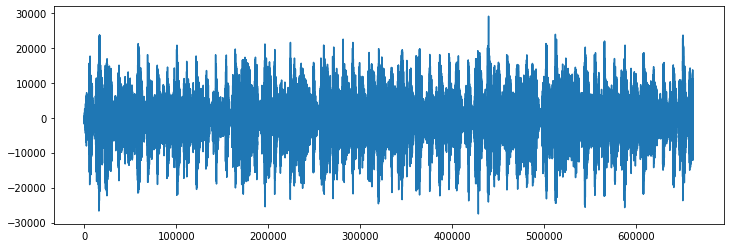

In [22]:
plt.figure(figsize=(12,4))
plt.plot(wave_audio)


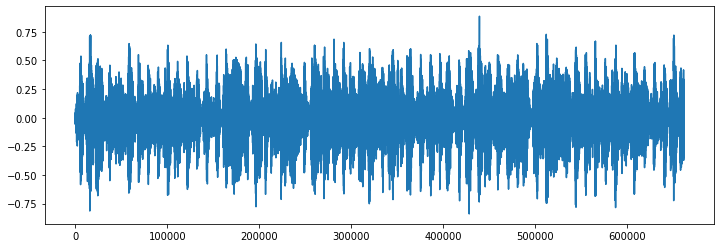

In [23]:
plt.figure(figsize=(12,4))
plt.plot(data)

## Extract Features

Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples.
MFCC summarizes the frequenc distribution across the window size, so it is possible to analze both the frequency and time characteristics of the sound
To identify features for classification

1.   Cepstrum -> spectrum 
2.   Quefrency -> frequency
3.   liftering -> filtering
4.   rhamonic ->  harmonic

### Computing cepstrum
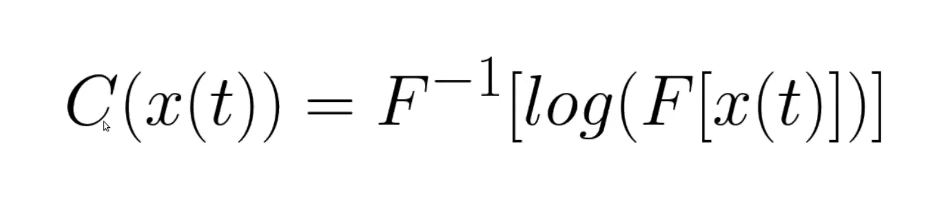


where x(t) is time domain signal;
F(x(t)) is the discrete fourier transform of the time domain signal hence converting the time domain signal to frequency domain;
then we apply logarithm to spectrum to get the log amplitude spectrum ;
finally we apply inverse fourier transform to log amplitude spectrum to get cepstrum.
### Cepstrum == spectrum of a spectrum

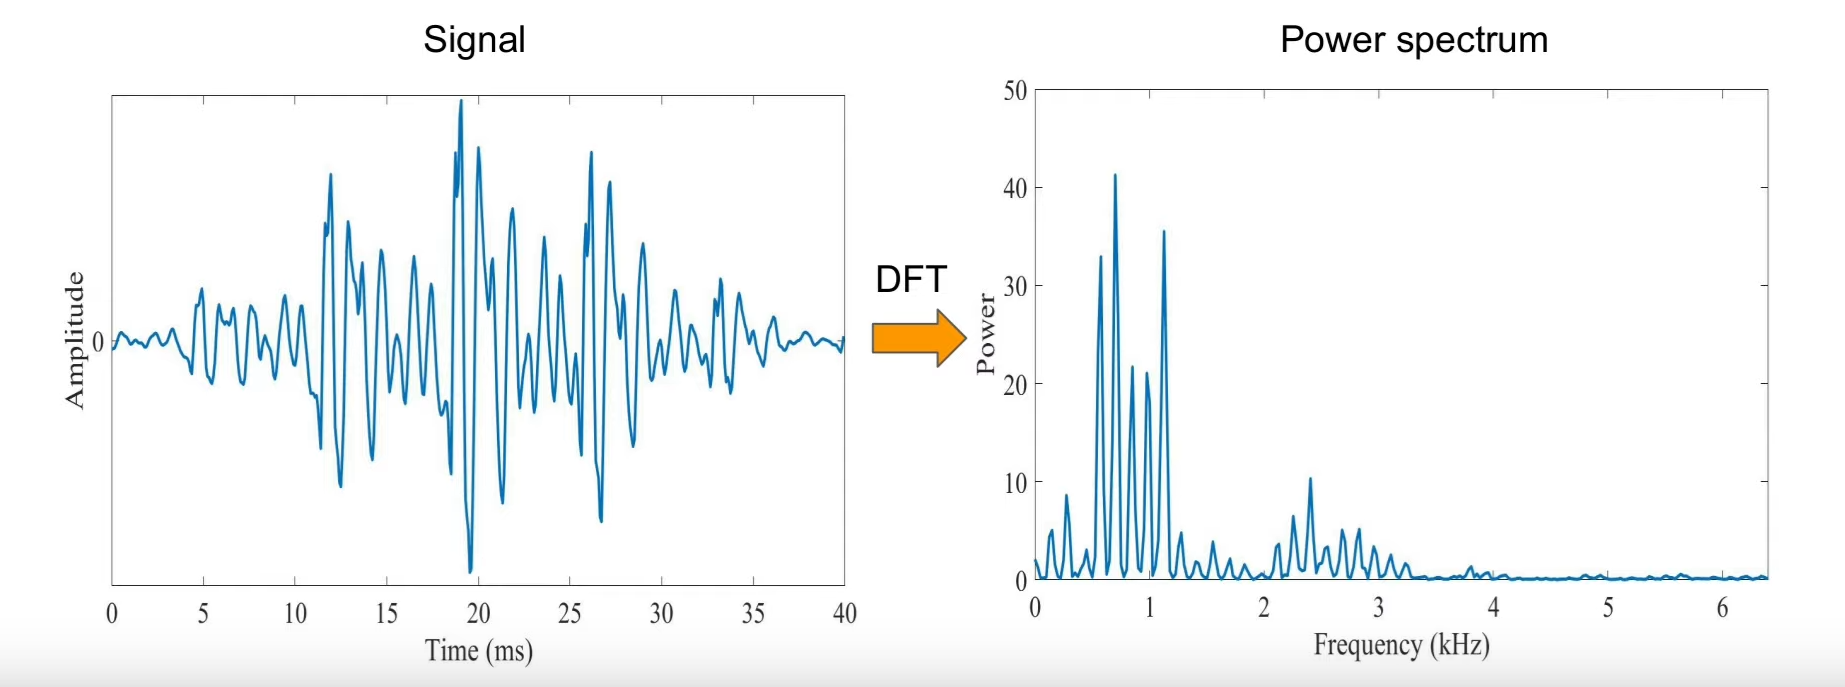


DFT -> discrete fourier transform
how much is the each frequency component present in the original signal

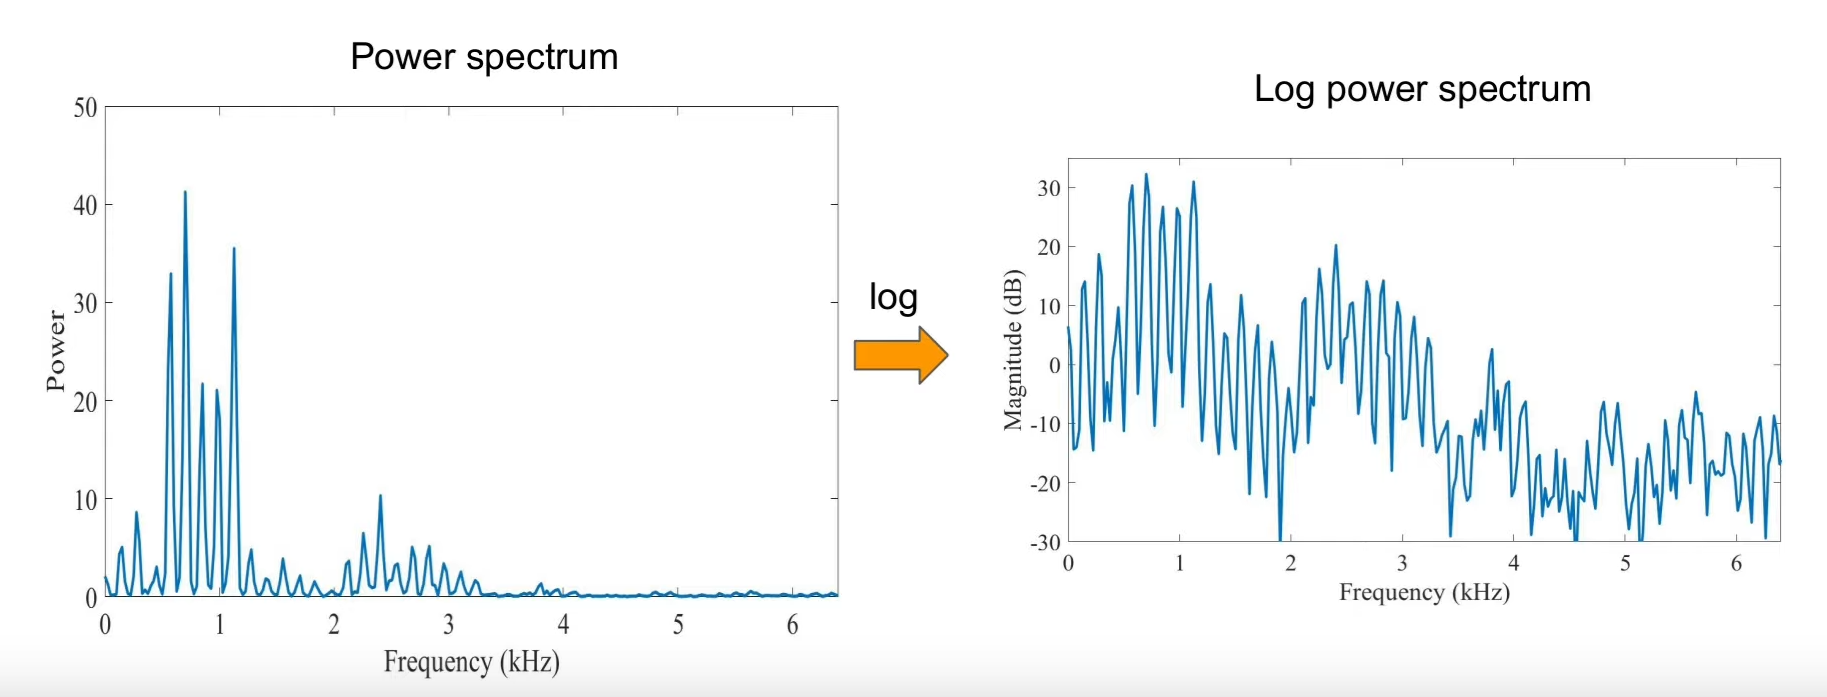



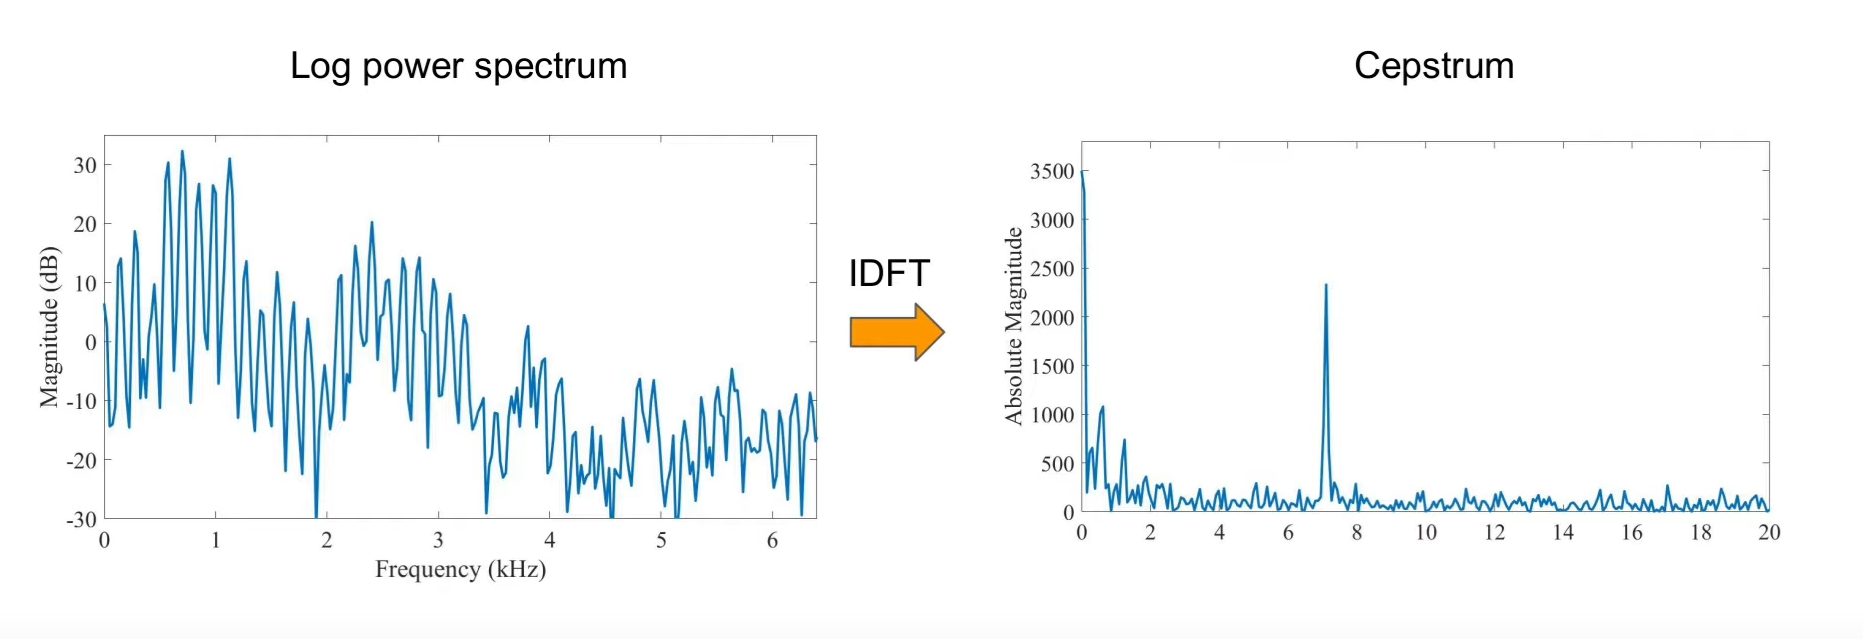

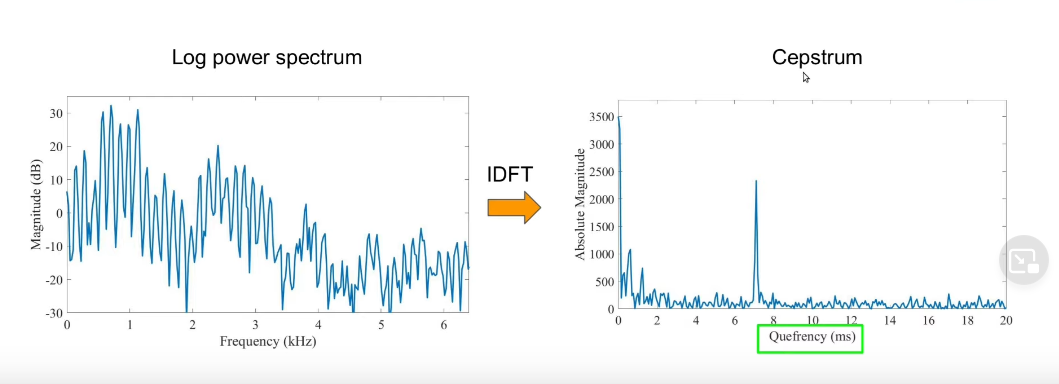

the final graph shows : how present these quefrencies are in the log power spectrum


In [24]:
mfccs = librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40)

In [25]:
mfccs.shape

(40, 1293)

In [26]:
mfccs

array([[-240.63544   , -211.21436   , -193.90889   , ..., -109.999146  ,
         -86.81443   ,  -84.07359   ],
       [  99.64764   ,  101.04283   ,  102.24396   , ...,  150.07935   ,
         138.94867   ,  138.30978   ],
       [  -7.403271  ,   -8.3585205 ,    1.9154358 , ...,  -50.795135  ,
         -36.53614   ,  -28.136354  ],
       ...,
       [   5.4359255 ,    2.5820074 ,   -3.0628562 , ...,   -1.4864376 ,
          -5.37206   ,   -1.4188329 ],
       [  -2.814918  ,   -1.4559293 ,   -4.716819  , ...,   -4.076762  ,
          -5.082726  ,    0.36488473],
       [   4.2981043 ,    1.794514  ,   -1.6581438 , ...,    2.920167  ,
          -1.2879069 ,   -2.5673516 ]], dtype=float32)

In [27]:
def features_extractor(filename):
  audio , sample_rate = librosa.load(filename,res_type='kaiser_fast')
  mfccs_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
  mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

  return mfccs_scaled_features

In [28]:
import numpy as np
from tqdm import tqdm
import os
## iterating over every audio file to extract features
## using MFCC
audio_dataset_path = '/content/Data/genres_original'
extracted_features =[]
for index_num,row in tqdm(metadata.iterrows()):
    if row['filename'] == 'jazz.00054.wav':
      print("file not found")
    else:
      filename = os.path.join(os.path.abspath(audio_dataset_path),str(row['label'])+'/', str(row['filename']))
      final_class_labels = row['label']
      data = features_extractor(filename)
      extracted_features.append([data,final_class_labels])


559it [00:49, 21.25it/s]

file not found


1000it [01:19, 12.61it/s]


In [29]:
print(len(extracted_features))

999


In [30]:
print(extracted_features)

[[array([-1.1359882e+02,  1.2157067e+02, -1.9162258e+01,  4.2363937e+01,
       -6.3622632e+00,  1.8621929e+01, -1.3699731e+01,  1.5339800e+01,
       -1.2274303e+01,  1.0970943e+01, -8.3260584e+00,  8.8020868e+00,
       -3.6699393e+00,  5.7446737e+00, -5.1627812e+00,  7.5170463e-01,
       -1.6878525e+00, -4.0873152e-01, -2.3026755e+00,  1.2224660e+00,
       -3.5328734e+00, -1.1397816e+00, -4.2828269e+00, -4.2260852e+00,
        9.1518825e-01,  9.1406345e-01, -5.7618070e+00, -3.9328041e+00,
        1.5094351e+00,  2.6984658e+00,  5.6560731e+00, -3.2690079e+00,
       -2.0606413e-01, -2.9996979e+00,  4.4763169e+00, -4.7685459e-01,
        6.0062852e+00, -5.9689835e-02, -3.4585855e+00, -1.8418318e+00],
      dtype=float32), 'blues'], [array([-2.07523834e+02,  1.23985138e+02,  8.94702435e+00,  3.58671455e+01,
        2.90959859e+00,  2.15194702e+01, -8.55650997e+00,  2.33706741e+01,
       -1.01036062e+01,  1.18992405e+01, -5.55882215e+00,  5.37787390e+00,
       -2.23449016e+00,  4.22

In [31]:
## converting extracted_features to pandas dataframe

In [32]:
extracted_features_df = pd.DataFrame(extracted_features,columns=['features','class'])
extracted_features_df.head()

features  class
0  [-113.59882, 121.57067, -19.162258, 42.363937,...  blues
1  [-207.52383, 123.98514, 8.947024, 35.867146, 2...  blues
2  [-90.757164, 140.44089, -29.084547, 31.686693,...  blues
3  [-199.57513, 150.08612, 5.663406, 26.855278, 1...  blues
4  [-160.35417, 126.209496, -35.581394, 22.139254...  blues

In [33]:
extracted_features_df['class'].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [34]:
# split the dataset into independent and dependent dataset
X = np.array(extracted_features_df['features'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [35]:
X.shape

(999, 40)

In [36]:
# ## label encoding
# y = np.array(pd.get_dummies(y))

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y))

In [37]:
y.shape

(999, 10)

In [38]:
 #train test split
from sklearn.model_selection import train_test_split
X_train , X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
X_train.shape

(799, 40)

In [40]:
X_test.shape

(200, 40)

## Model creation

In [41]:
import tensorflow as tf


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [43]:
# no of classes
num_labels = y.shape[1]

In [44]:
#Dense()

In [45]:
model = Sequential()

In [46]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))


In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)              

In [48]:
model.compile(loss = 'categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [49]:
## training the model

from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 500
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/saved_models/audio_classifier/ann.hdf5',verbose=1,save_best_only=True)

start = datetime.now()

model.fit(X_train,y_train,batch_size=num_batch_size,epochs=num_epochs,validation_data=(X_test,y_test),callbacks=[checkpointer])

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/500
17/25 [===================>..........] - ETA: 0s - loss: 30.4579 - accuracy: 0.1195 
Epoch 1: val_loss improved from inf to 3.07372, saving model to /content/drive/MyDrive/saved_models/audio_classifier/ann.hdf5
25/25 [==============================] - 3s 42ms/step - loss: 26.5514 - accuracy: 0.1239 - val_loss: 3.0737 - val_accuracy: 0.1250
Epoch 2/500
17/25 [===================>..........] - ETA: 0s - loss: 13.6401 - accuracy: 0.1250
Epoch 2: val_loss improved from 3.07372 to 2.27484, saving model to /content/drive/MyDrive/saved_models/audio_classifier/ann.hdf5
25/25 [==============================] - 0s 8ms/step - loss: 12.2235 - accuracy: 0.1302 - val_loss: 2.2748 - val_accuracy: 0.0800
Epoch 3/500
17/25 [===================>..........] - ETA: 0s - loss: 7.7509 - accuracy: 0.1232
Epoch 3: val_loss improved from 2.27484 to 2.23215, saving model to /content/drive/MyDrive/saved_models/audio_classifier/ann.hdf5
25/25 [==============================] - 0s 7ms/step - loss: 7.26

In [50]:
test_accuracy = model.evaluate(X_test, y_test,verbose = 0)
print(test_accuracy[1])

0.574999988079071


In [51]:
!pip install resampy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
filename='/content/Data/genres_original/rock/rock.00001.wav'
prediction_features = features_extractor(filename)
prediction_features = prediction_features.reshape(1,-1)
predict=model.predict(prediction_features) 
predict_class=np.argmax(predict,axis=1)
if(predict_class == 0):
  print("Genre is blues")
elif predict_class==1:
  print("Genre is classical")
elif predict_class==2:
  print("Genre is country")
elif predict_class==3:
  print("Genre is disco")
elif predict_class==4:
  print("Genre is hiphop")
elif predict_class==5:
  print("Genre is jazz")
elif predict_class==6:
  print("Genre is metal")
elif predict_class==7:
  print("Genre is pop")
elif predict_class==8:
  print("Genre is reggae")
else:
  print("Genre is rock")

1/1 [==============================] - 0s 130ms/step
Genre is rock


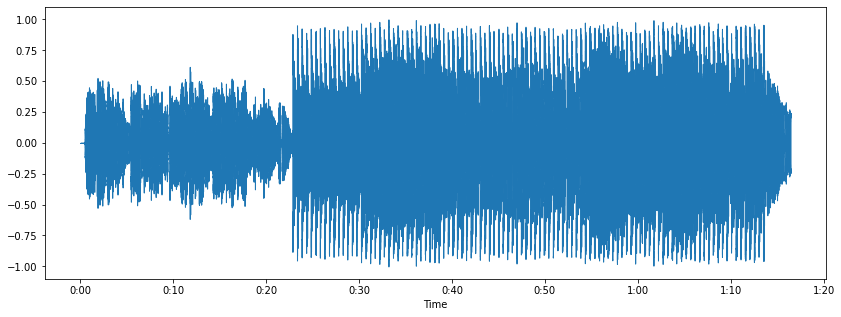

In [53]:
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load('/content/Counting-Stars.wav')
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [54]:
data

array([-1.2900405e-06, -4.8717734e-06,  8.4695284e-06, ...,
        3.6214001e-02,  1.2063190e-02,  0.0000000e+00], dtype=float32)

In [55]:
sample_rate

22050

In [56]:
import pickle 
pickle.dump(model, open('model.pkl', 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......activation
.........vars
......activation_1
.........vars
......activation_2
.........vars
......activation_3
.........vars
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......dropout_2
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
metadata.json     